# Análise de Registros de Crimes para o Planejamento Estratégico da Polícia

Neste notebook, faremos uma análise dos registros de crimes cometidos em uma determinada região com o objetivo de contribuir para o planejamento estratégico da polícia local.

## Objetivo

O objetivo principal desta análise é identificar padrões e tendências nos registros de crimes, auxiliando a polícia a tomar decisões informadas sobre alocação de recursos e estratégias de combate à criminalidade.

## Dados Utilizados

Os dados utilizados nesta análise consistem em registros de crimes, incluindo informações como tipo de crime, data, hora, e localização geográfica (latitude e longitude). Os tipos de crimes considerados são:

- Assalto
- Roubo
- Homicídio
- Furto
- Tráfico de Drogas

## Métodos Utilizados

Para realizar a análise, seguiremos os seguintes passos:

1. Carregamento e limpeza dos dados
2. Análise exploratória dos dados
3. Aplicação de técnicas de clustering para identificar padrões nos registros de crimes
4. Visualização dos clusters identificados

## Resultados Esperados

Esperamos identificar grupos de crimes semelhantes em determinadas regiões geográficas, o que pode ajudar a polícia a priorizar áreas de patrulhamento e investigação. Além disso, a análise também pode fornecer insights sobre tendências temporais e sazonalidades nos crimes.

## Conclusões

Ao final da análise, esperamos ter uma compreensão mais clara dos padrões de criminalidade na região estudada e recomendações acionáveis para o planejamento estratégico da polícia.

Para começar, vamos carregar os dados e realizar a limpeza inicial.


In [48]:
# Importar bibliotecas
import pandas as pd
from datetime import datetime, timedelta
import random

### 2. Criação do DataFrame:

In [69]:
# Definindo tipos de crimes
tipos_de_crime = ['Assalto', 'Roubo', 'Homicídio', 'Furto', 'Tráfico de Drogas']

# Gerando dados aleatórios
num_crimes = 150
crimes = []

# Definir a data de início
data_inicial = datetime(2023, 1, 1)

for n in range(num_crimes):
    crime = {
        'Tipo de Crime': random.choice(tipos_de_crime), # valores randomicos para os tipos
        'Latitude': round(random.uniform(-90, 90), 6),
        'Longitude': round(random.uniform(-180, 180), 6),
        'Data': [data_inicial + timedelta(days=random.randint(0, 365)) for _ in range(100)],
        'Hora': f"{random.randint(0, 23):02d}:{random.randint(0, 59):02d}"
    }
    crimes.append(crime)

# Criando DataFrame
df_crimes = pd.DataFrame(crimes)

# Expandir a coluna 'Data' em linhas separadas
df_crimes = df_crimes.explode('Data')

# Organizar DataFrame por data
df_crimes = df_crimes.sort_values(by=['Data', 'Hora'])

# Reorganizar o índice
df_crimes = df_crimes.reset_index(drop=True)

# Exibindo os primeiros registros
df_crimes.head(10)


,Tipo de Crime,Latitude,Longitude,Data,Hora
0,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26
1,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26
2,Tráfico de Drogas,-80.450691,56.092170,2023-01-01,00:47
3,Tráfico de Drogas,-5.701830,-88.162352,2023-01-01,01:34
4,Furto,-58.924460,90.630308,2023-01-01,01:50
5,Roubo,3.064228,89.876249,2023-01-01,01:52
6,Furto,-49.405865,20.835300,2023-01-01,03:00
7,Homicídio,-67.758337,-95.275773,2023-01-01,03:01
8,Assalto,46.714018,87.588652,2023-01-01,05:34
9,Assalto,80.472674,-101.616605,2023-01-01,05:38


### 3. Gerando o Cluster

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


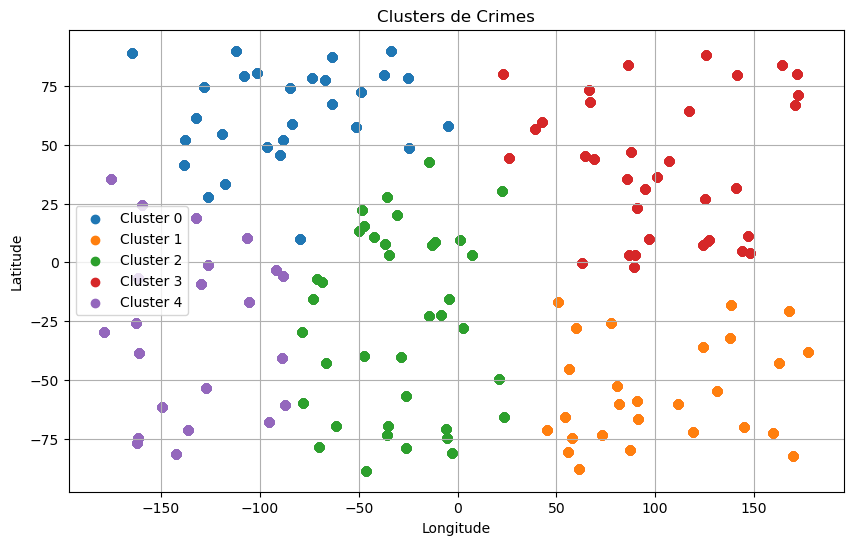

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Número de clusters desejado
num_clusters = 5

# Selecionando apenas as características relevantes para clustering (latitude e longitude)
X = df_crimes[['Latitude', 'Longitude']]

# Aplicando o algoritmo K-Means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Adicionando os rótulos dos clusters ao DataFrame original
df_crimes['Cluster'] = kmeans.labels_

# Visualizando os clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df_crimes[df_crimes['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
plt.title('Clusters de Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


## Avaliando a possibilidade de acontecimento na reagiao, com previsoes

In [31]:
df_crimes.head(10)

,Tipo de Crime,Latitude,Longitude,Data,Hora,Cluster
0,Roubo,-30.739515,-36.235681,2023-01-01,00:05,3
1,Roubo,-30.739515,-36.235681,2023-01-01,00:05,3
2,Roubo,-30.739515,-36.235681,2023-01-01,00:05,3
3,Furto,-71.440572,-60.885122,2023-01-01,00:07,3
4,Assalto,80.236770,89.938405,2023-01-01,00:19,2
5,Furto,-77.882949,86.380318,2023-01-01,00:22,0
6,Roubo,-50.221382,-19.488001,2023-01-01,00:24,3
7,Roubo,-32.603247,-36.566422,2023-01-01,00:34,3
8,Roubo,33.619749,3.205798,2023-01-01,00:35,4
9,Tráfico de Drogas,-27.140271,-41.966925,2023-01-01,00:49,3


In [32]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Tipo de Crime  100000 non-null  object        
 1   Latitude       100000 non-null  float64       
 2   Longitude      100000 non-null  float64       
 3   Data           100000 non-null  datetime64[ns]
 4   Hora           100000 non-null  object        
 5   Cluster        100000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 4.2+ MB


In [33]:
df_crimes.describe()

,Latitude,Longitude,Data,Cluster
count,100000.000000,100000.000000,100000,100000.000000
mean,-1.285877,3.205989,2023-07-02 21:36:02.591999744,1.893000
min,-89.999520,-179.935074,2023-01-01 00:00:00,0.000000
25%,-45.179677,-82.915813,2023-04-03 00:00:00,1.000000
50%,-1.767159,7.762983,2023-07-03 00:00:00,2.000000
75%,43.518546,92.061974,2023-10-02 00:00:00,3.000000
max,89.733726,179.947824,2024-01-01 00:00:00,4.000000
std,52.475537,102.680088,NaN,1.366591


In [71]:
# Convertendo a coluna 'Data' para datetime
df_crimes['Data'] = pd.to_datetime(df_crimes['Data'])

# Convertendo a coluna 'Hora' para string
df_crimes['Hora'] = df_crimes['Hora'].astype(str)

In [35]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Tipo de Crime  100000 non-null  object        
 1   Latitude       100000 non-null  float64       
 2   Longitude      100000 non-null  float64       
 3   Data           100000 non-null  datetime64[ns]
 4   Hora           100000 non-null  object        
 5   Cluster        100000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 4.2+ MB


In [72]:
# Função para determinar o período do dia com base na hora
def periodo_do_dia(hora):
    if hora < 12:
        return 'Manhã'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Criando uma coluna 'Período do Dia' com base na coluna 'Hora'
df_crimes['Período do Dia'] = df_crimes['Hora'].apply(lambda x: periodo_do_dia(int(x.split(':')[0])))

# Exibindo os primeiros registros
df_crimes.head()


,Tipo de Crime,Latitude,Longitude,Data,Hora,Cluster,Período do Dia
0,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26,2,Manhã
1,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26,2,Manhã
2,Tráfico de Drogas,-80.450691,56.092170,2023-01-01,00:47,1,Manhã
3,Tráfico de Drogas,-5.701830,-88.162352,2023-01-01,01:34,4,Manhã
4,Furto,-58.924460,90.630308,2023-01-01,01:50,1,Manhã


In [73]:
# Convertendo variáveis categóricas em números
df_encoded = pd.get_dummies(df_crimes, columns=['Período do Dia'])
df_encoded

,Tipo de Crime,Latitude,Longitude,Data,Hora,Cluster,Período do Dia_Manhã,Período do Dia_Noite,Período do Dia_Tarde
0,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26,2,True,False,False
1,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,00:26,2,True,False,False
2,Tráfico de Drogas,-80.450691,56.092170,2023-01-01,00:47,1,True,False,False
3,Tráfico de Drogas,-5.701830,-88.162352,2023-01-01,01:34,4,True,False,False
4,Furto,-58.924460,90.630308,2023-01-01,01:50,1,True,False,False
...,...,...,...,...,...,...,...,...,...
14995,Roubo,31.749672,140.831942,2024-01-01,18:58,3,False,True,False
14996,Assalto,27.891108,-35.893561,2024-01-01,20:26,2,False,True,False
14997,Roubo,-81.123415,-2.735105,2024-01-01,20:44,2,False,True,False
14998,Assalto,71.296673,172.408455,2024-01-01,21:18,3,False,True,False


In [74]:
df_encoded = df_encoded.drop(columns=['Hora'])
df_encoded

,Tipo de Crime,Latitude,Longitude,Data,Cluster,Período do Dia_Manhã,Período do Dia_Noite,Período do Dia_Tarde
0,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,2,True,False,False
1,Tráfico de Drogas,-70.821025,-5.812163,2023-01-01,2,True,False,False
2,Tráfico de Drogas,-80.450691,56.092170,2023-01-01,1,True,False,False
3,Tráfico de Drogas,-5.701830,-88.162352,2023-01-01,4,True,False,False
4,Furto,-58.924460,90.630308,2023-01-01,1,True,False,False
...,...,...,...,...,...,...,...,...
14995,Roubo,31.749672,140.831942,2024-01-01,3,False,True,False
14996,Assalto,27.891108,-35.893561,2024-01-01,2,False,True,False
14997,Roubo,-81.123415,-2.735105,2024-01-01,2,False,True,False
14998,Assalto,71.296673,172.408455,2024-01-01,3,False,True,False


In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo de Crime         36500 non-null  object        
 1   Latitude              36500 non-null  float64       
 2   Longitude             36500 non-null  float64       
 3   Data                  36500 non-null  datetime64[ns]
 4   Cluster               36500 non-null  int32         
 5   Período do Dia_Manhã  36500 non-null  bool          
 6   Período do Dia_Noite  36500 non-null  bool          
 7   Período do Dia_Tarde  36500 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 1.4+ MB


In [75]:
df_correlacao = pd.get_dummies(df_encoded, columns=['Tipo de Crime'])
df_correlacao = df_correlacao.drop(columns=['Cluster'])
df_correlacao

,Latitude,Longitude,Data,Período do Dia_Manhã,Período do Dia_Noite,Período do Dia_Tarde,Tipo de Crime_Assalto,Tipo de Crime_Furto,Tipo de Crime_Homicídio,Tipo de Crime_Roubo,Tipo de Crime_Tráfico de Drogas
0,-70.821025,-5.812163,2023-01-01,True,False,False,False,False,False,False,True
1,-70.821025,-5.812163,2023-01-01,True,False,False,False,False,False,False,True
2,-80.450691,56.092170,2023-01-01,True,False,False,False,False,False,False,True
3,-5.701830,-88.162352,2023-01-01,True,False,False,False,False,False,False,True
4,-58.924460,90.630308,2023-01-01,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
14995,31.749672,140.831942,2024-01-01,False,True,False,False,False,False,True,False
14996,27.891108,-35.893561,2024-01-01,False,True,False,True,False,False,False,False
14997,-81.123415,-2.735105,2024-01-01,False,True,False,False,False,False,True,False
14998,71.296673,172.408455,2024-01-01,False,True,False,True,False,False,False,False


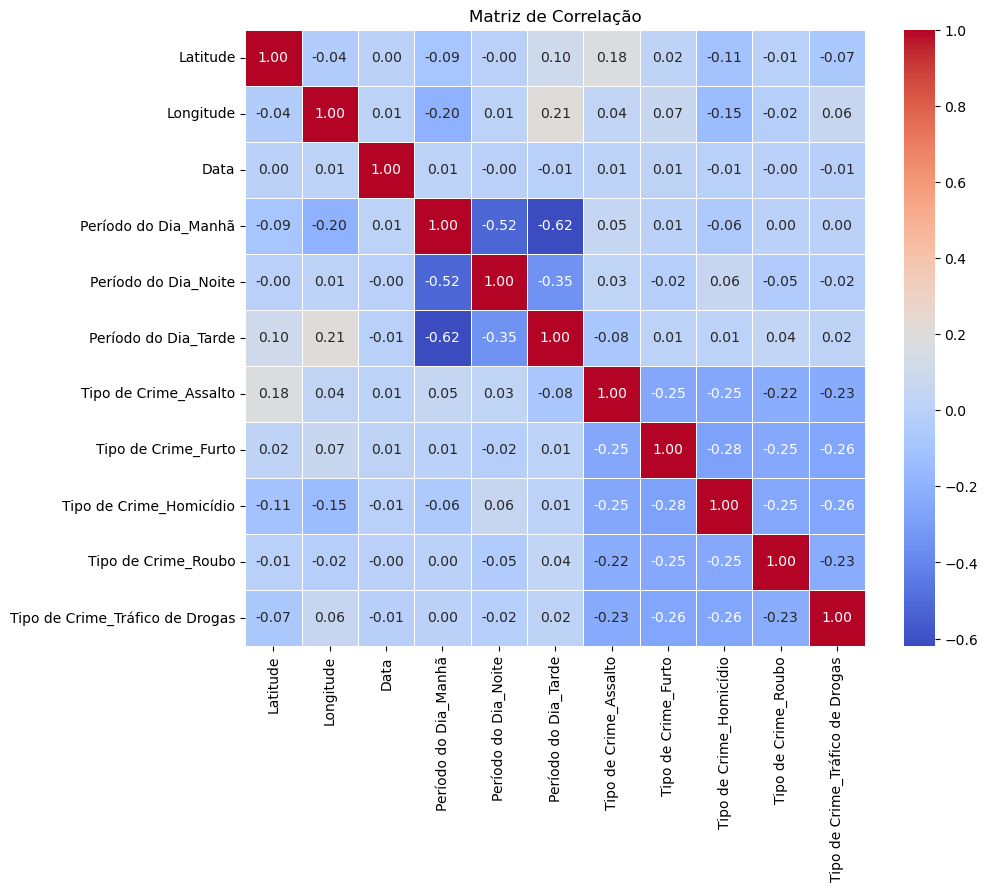

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = df_correlacao.corr()

# Criando um mapa de calor com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [64]:
# Bibliotecas:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treino e teste
X = df_encoded.drop(['Tipo de Crime', 'Cluster', 'Data'], axis=1)  # Características (features)
y = df_encoded['Tipo de Crime']  # Variável alvo (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Bibliotecas:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Treinando um modelo de RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Florestas Aleatórias:
pred_rfc = rfc.predict(X_test)

In [62]:
# Bibliotecas:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
# Avaliando o desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, pred_rfc))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, pred_rfc))

Relatório de Classificação:
                   precision    recall  f1-score   support

          Assalto       1.00      1.00      1.00      2144
            Furto       1.00      1.00      1.00      2198
        Homicídio       1.00      1.00      1.00      1754
            Roubo       1.00      1.00      1.00      2044
Tráfico de Drogas       1.00      1.00      1.00      2810

         accuracy                           1.00     10950
        macro avg       1.00      1.00      1.00     10950
     weighted avg       1.00      1.00      1.00     10950

Matriz de Confusão:
[[2144    0    0    0    0]
 [   0 2198    0    0    0]
 [   0    0 1754    0    0]
 [   0    0    0 2044    0]
 [   0    0    0    0 2810]]
